In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [121]:
def selection(population, objective_vals, M):
    I = np.argsort(objective_vals)[::-1]
    population = population[I[:M], :]
    objective_vals = objective_vals[I[:M]]
    return population, objective_vals


def random_population(prob_vector, N):
    population = np.array([
        np.random.choice([0, 1], N, p=[1-prob, prob])
        for prob in prob_vector
    ])
    return population.T


def model_estimation(P):
    return P.sum(axis=0) / P.shape[0]


def umda(T, F, N, M, d):
    prob_vector = np.full(d, 0.5)
    P = random_population(prob_vector, N)
    obj_vals = F(P)
    time0 = time.time()

    prob_v_history = []
    results_history = []

    for i in range(T):
        P_selected, selected_obj_vals = selection(P, obj_vals, M)
        prob_vector = model_estimation(P_selected)
        P = random_population(prob_vector, N)
        obj_vals = F(P)

        if not i % (T/10) or i == T-1:
            print('%3d %14.8f min: %12.8f mean: %12.8f max: %12.8f std: %12.8f\r' % (
                    i, time.time() - time0,
                    obj_vals.min(), obj_vals.mean(),
                    obj_vals.max(), obj_vals.std())
                 )

        results_history.append(obj_vals)
        prob_v_history.append(prob_vector)

    return {
        'results_history': results_history,
        'prob_v_history': prob_v_history,
    }

In [122]:
def run_umda(T, F, N, M, d):
    results = umda(T, F, N, M, d)
    history = results['results_history']
    prob_v = results['prob_v_history']

    plt.figure(figsize=(10, 6), dpi=80)
    plt.xticks(np.arange(0, T+1, int(T/10)))

    xs = np.array(range(T))

    plt.title('max, mean, min')
    plt.plot(xs, list(map(np.max, history)))
    plt.plot(xs, list(map(np.mean, history)))
    plt.plot(xs, list(map(np.min, history)))

    plt.show()

    plt.figure(figsize=(10, 6), dpi=80)
    plt.title('Probability vectors')
    plt.plot(xs, prob_v)

    plt.figure(figsize=(10, 6), dpi=80)
    plt.title('Max, mean, min probability vectors')
    plt.plot(xs, list(map(np.max, prob_v)))
    plt.plot(xs, list(map(np.mean, prob_v)))
    plt.plot(xs, list(map(np.min, prob_v)))

    plt.show()

In [142]:
def one_max(population):
    return np.sum(population, axis=1)


def deceptive_one_max(population):
    sums = np.sum(population, axis=1)
    for i, s in enumerate(sums):
        if s == 0:
            sums[i] = population.shape[1] + 1
    return sums


def k_deceptive_one_max(k, population):
    pops = np.hsplit(population, k)
    sums = np.array(list(map(deceptive_one_max, pops))).T
    return sums.sum(axis=1)

  0     0.03027511 min: 226.00000000 mean: 267.75600000 max: 301.00000000 std:  11.30081696
  3     0.10828638 min: 294.00000000 mean: 325.13600000 max: 357.00000000 std:  10.47594884
  6     0.17924738 min: 347.00000000 mean: 378.39100000 max: 406.00000000 std:   9.38744475
  9     0.25843000 min: 400.00000000 mean: 423.10100000 max: 450.00000000 std:   7.88383149
 12     0.33077693 min: 443.00000000 mean: 460.53700000 max: 482.00000000 std:   5.66627135
 15     0.39881825 min: 474.00000000 mean: 485.20400000 max: 496.00000000 std:   3.71623250
 18     0.47137427 min: 494.00000000 mean: 498.84200000 max: 500.00000000 std:   1.01244062
 21     0.54082704 min: 500.00000000 mean: 500.00000000 max: 500.00000000 std:   0.00000000
 24     0.60576630 min: 500.00000000 mean: 500.00000000 max: 500.00000000 std:   0.00000000
 27     0.67224240 min: 500.00000000 mean: 500.00000000 max: 500.00000000 std:   0.00000000
 29     0.72380114 min: 500.00000000 mean: 500.00000000 max: 500.00000000 std:  

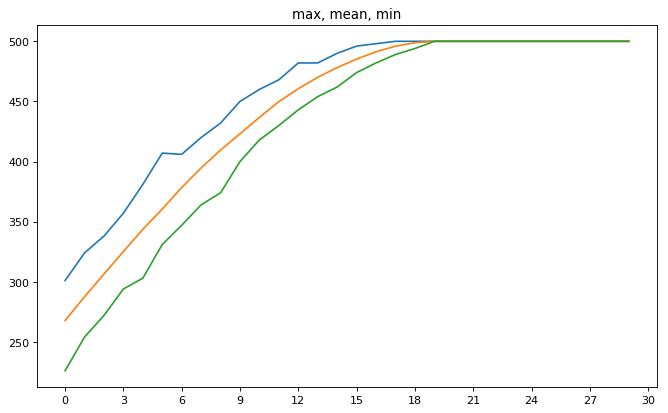

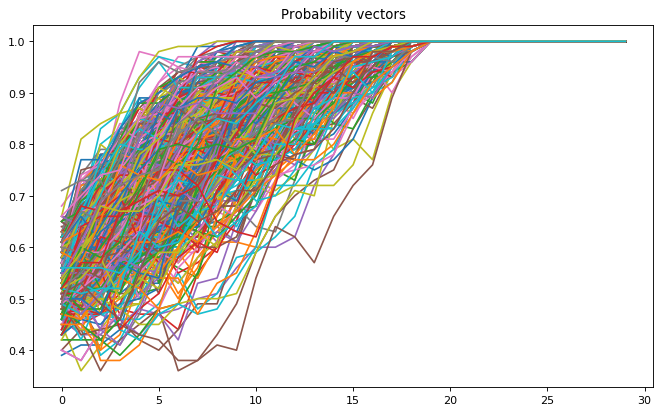

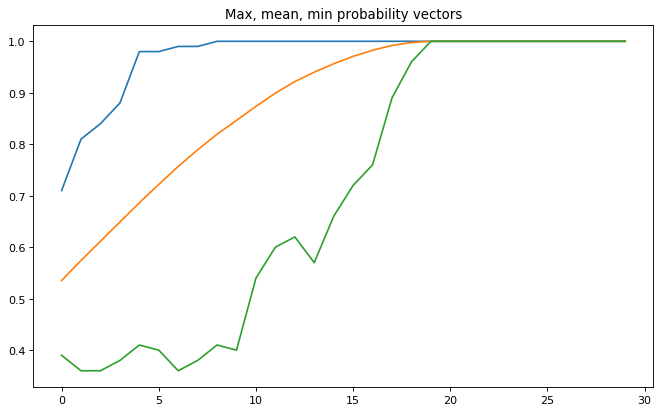

In [127]:
params = {
    'T': 30,
    'F': one_max,
    'N': 1000,
    'M': 100,
    'd': 500,
}
run_umda(**params)


  0     0.05341887 min: 498.00000000 mean: 544.24500000 max: 598.00000000 std:  15.07066604
  4     0.23735881 min: 646.00000000 mean: 685.55800000 max: 726.00000000 std:  11.76012908
  8     0.42232347 min: 769.00000000 mean: 796.77600000 max: 820.00000000 std:   8.31852295
 12     0.59825540 min: 852.00000000 mean: 870.52600000 max: 888.00000000 std:   5.52931497
 16     0.78062773 min: 906.00000000 mean: 914.56300000 max: 922.00000000 std:   2.57099806
 20     0.95736480 min: 924.00000000 mean: 924.00000000 max: 924.00000000 std:   0.00000000
 24     1.15823531 min: 924.00000000 mean: 924.00000000 max: 924.00000000 std:   0.00000000
 28     1.34430647 min: 924.00000000 mean: 924.00000000 max: 924.00000000 std:   0.00000000
 32     1.55152917 min: 924.00000000 mean: 924.00000000 max: 924.00000000 std:   0.00000000
 36     1.76089740 min: 924.00000000 mean: 924.00000000 max: 924.00000000 std:   0.00000000
 39     1.93633938 min: 924.00000000 mean: 924.00000000 max: 924.00000000 std:  

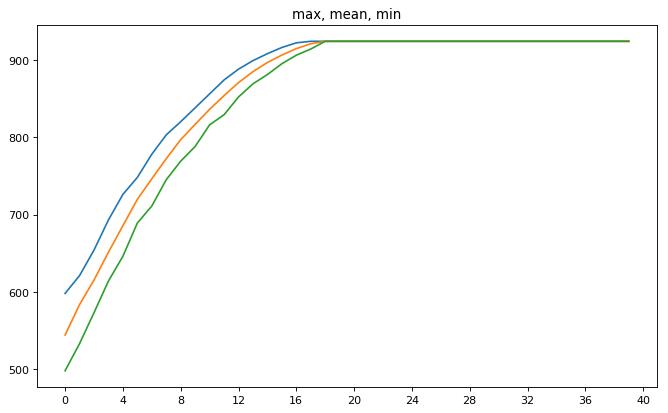

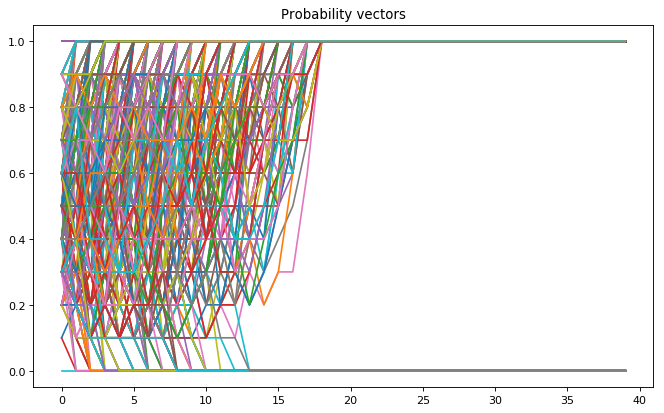

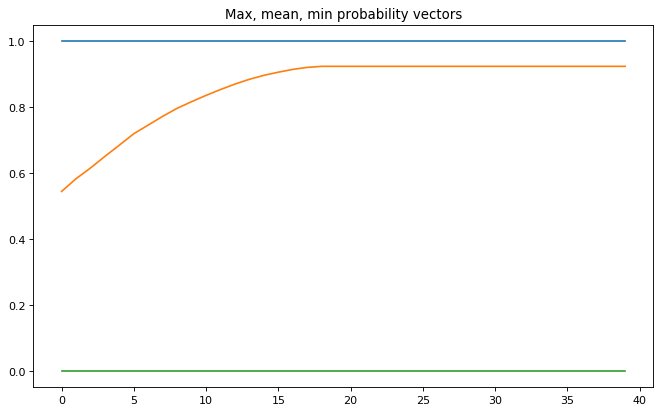

In [128]:
params = {
    'T': 40,
    'F': one_max,
    'N': 1000,
    'M': 10,
    'd': 1000,
}
run_umda(**params)


  0     0.00520802 min:  40.00000000 mean:  57.12800000 max:  73.00000000 std:   5.07184542
  4     0.02430964 min:  68.00000000 mean:  82.49800000 max:  93.00000000 std:   3.86807394
  8     0.04386997 min:  93.00000000 mean:  98.08000000 max: 100.00000000 std:   1.33925352
 12     0.06230688 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 16     0.08021832 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 20     0.09704423 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 24     0.11231017 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 28     0.12711334 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 32     0.14296937 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 36     0.15910649 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 39     0.17036104 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:  

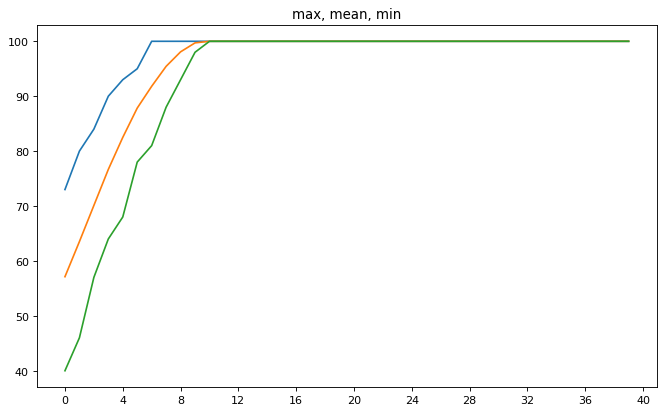

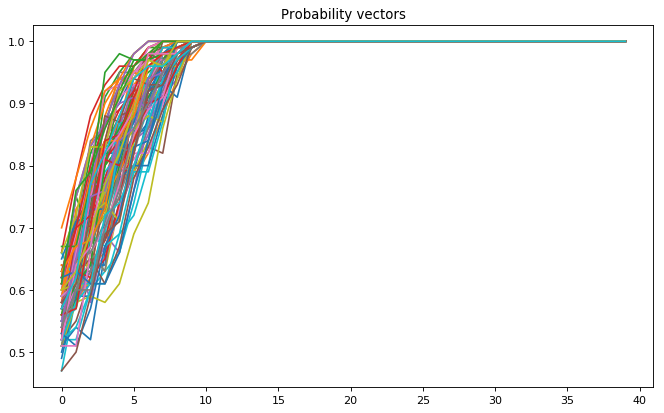

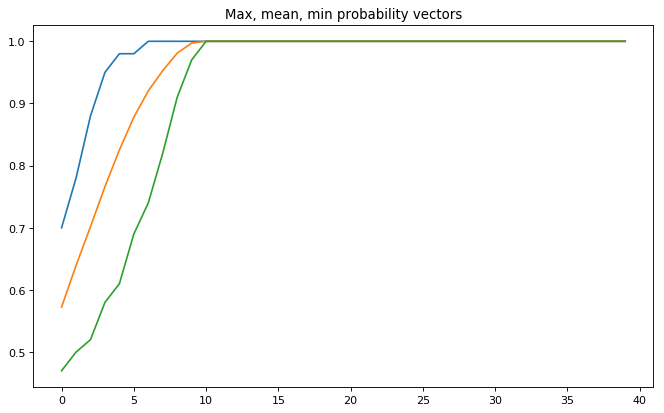

In [132]:
params = {
    'T': 40,
    'F': deceptive_one_max,
    'N': 500,
    'M': 100,
    'd': 100,
}
run_umda(**params)

  0     0.05615735 min: 479.00000000 mean: 527.56800000 max: 578.00000000 std:  16.05002729
  5     0.31728911 min: 617.00000000 mean: 662.93500000 max: 712.00000000 std:  14.42181594
 10     0.58763123 min: 736.00000000 mean: 780.36100000 max: 823.00000000 std:  13.11292031
 15     0.83845210 min: 850.00000000 mean: 882.71200000 max: 915.00000000 std:   9.76007459
 20     1.13879824 min: 932.00000000 mean: 954.28600000 max: 972.00000000 std:   6.24036890
 25     1.39955020 min: 986.00000000 mean: 994.77000000 max: 1000.00000000 std:   2.22869917
 30     1.63276672 min: 1000.00000000 mean: 1000.00000000 max: 1000.00000000 std:   0.00000000
 35     1.88550401 min: 1000.00000000 mean: 1000.00000000 max: 1000.00000000 std:   0.00000000
 40     2.13665199 min: 1000.00000000 mean: 1000.00000000 max: 1000.00000000 std:   0.00000000
 45     2.41383338 min: 1000.00000000 mean: 1000.00000000 max: 1000.00000000 std:   0.00000000
 49     2.59619713 min: 1000.00000000 mean: 1000.00000000 max: 1000

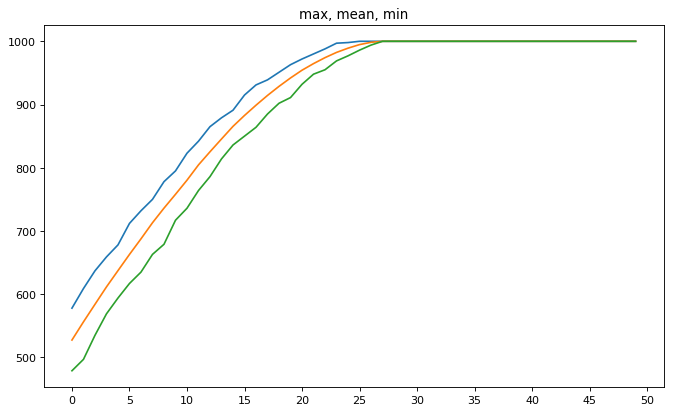

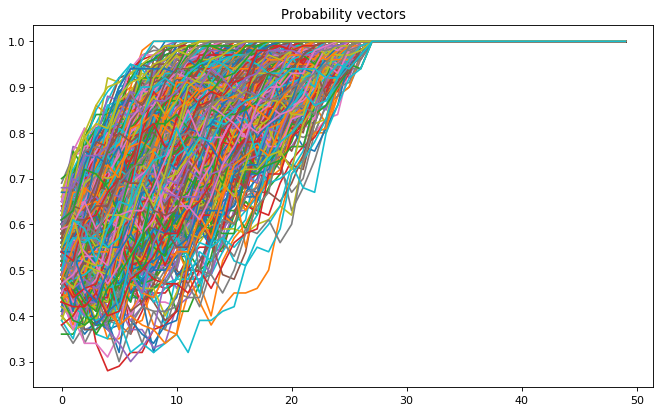

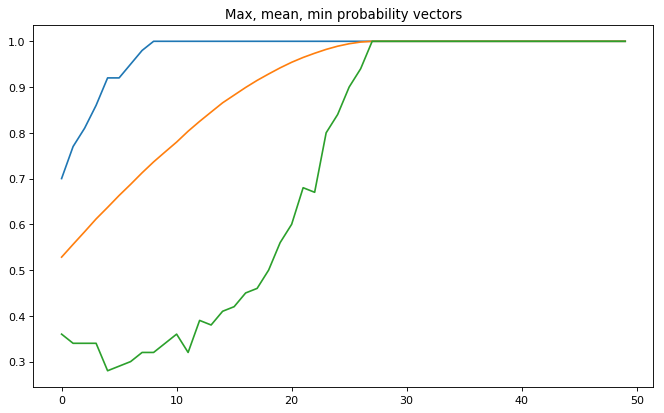

In [136]:
params = {
    'T': 50,
    'F': deceptive_one_max,
    'N': 1000,
    'M': 100,
    'd': 1000,
}
run_umda(**params)

  0     0.32331276 min:  36.00000000 mean:  56.74852000 max:  82.00000000 std:   5.08528444
  5     1.94270802 min: 105.00000000 mean: 105.90000000 max: 106.00000000 std:   0.30000000
 10     3.55496144 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:   0.00000000
 15     5.25483751 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:   0.00000000
 20     6.88882184 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:   0.00000000
 25     8.64663315 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:   0.00000000
 30    10.30485272 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:   0.00000000
 35    11.97797227 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:   0.00000000
 40    13.64387751 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:   0.00000000
 45    15.29162121 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:   0.00000000
 49    16.60295463 min: 106.00000000 mean: 106.00000000 max: 106.00000000 std:  

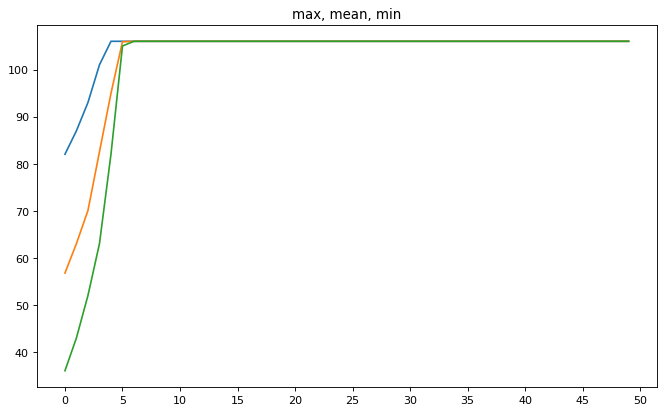

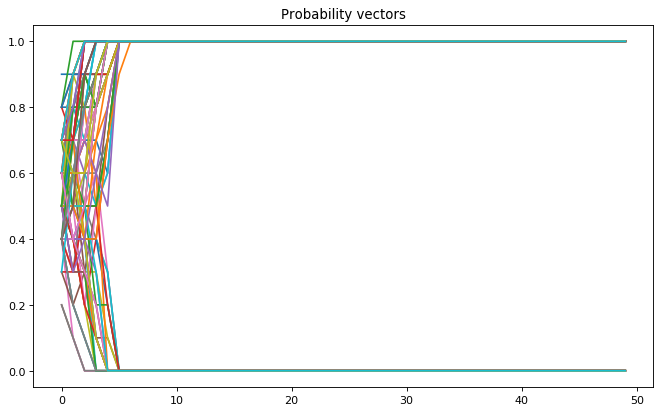

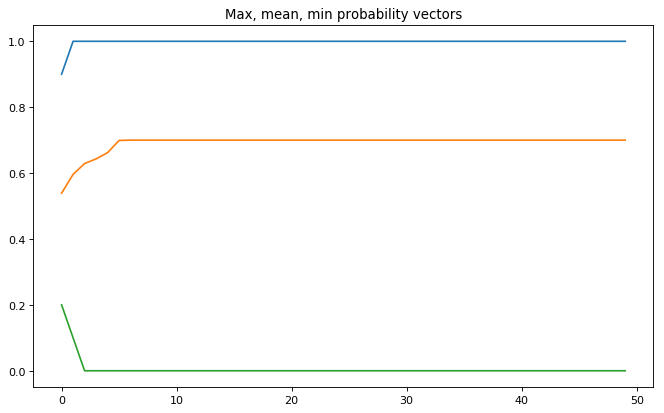

In [149]:
params = {
    'T': 50,
    'F': partial(k_deceptive_one_max, 20),
    'N': 50000,
    'M': 10,
    'd': 100,
}
run_umda(**params)

  0     0.03982115 min:  50.00000000 mean:  65.48680000 max:  82.00000000 std:   4.49889161
  5     0.19842935 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 10     0.37946582 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 15     0.52999568 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 20     0.68596959 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 25     0.87982726 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 30     1.09806943 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 35     1.27657533 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 40     1.44336963 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 45     1.64137936 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 49     1.81372118 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:  

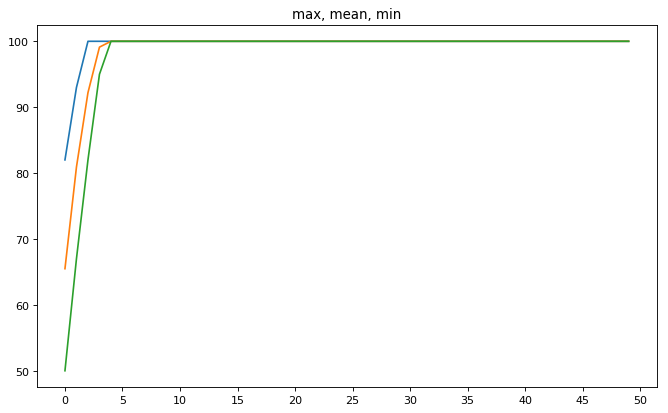

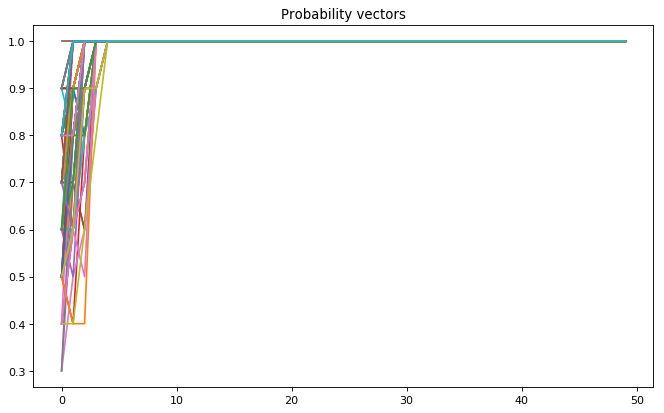

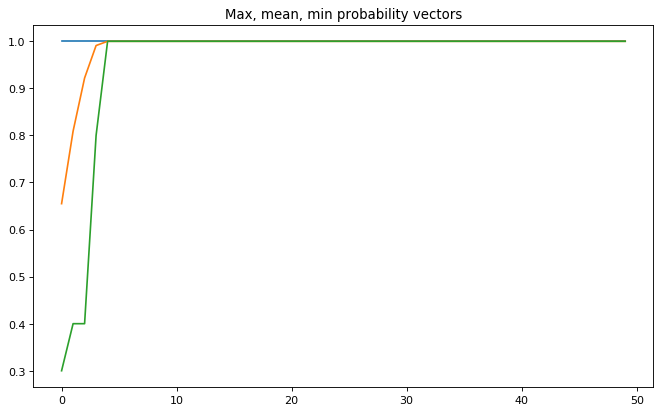

In [155]:
params = {
    'T': 50,
    'F': partial(k_deceptive_one_max, 5),
    'N': 10000,
    'M': 10,
    'd': 100,
}
run_umda(**params)

  0     0.37391543 min:  38.00000000 mean:  58.46682000 max:  86.00000000 std:   5.48443061
  5     2.39316916 min:  62.00000000 mean:  84.87224000 max: 105.00000000 std:   5.10548699
 10     4.79688811 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:   0.00000000
 15     6.97319627 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:   0.00000000
 20     9.21439505 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:   0.00000000
 25    11.47826529 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:   0.00000000
 30    13.85574365 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:   0.00000000
 35    16.12880230 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:   0.00000000
 40    18.59841108 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:   0.00000000
 45    20.98187160 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:   0.00000000
 49    22.88286877 min: 109.00000000 mean: 109.00000000 max: 109.00000000 std:  

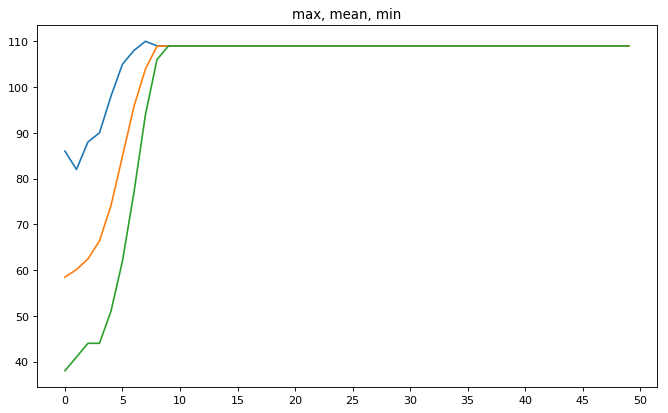

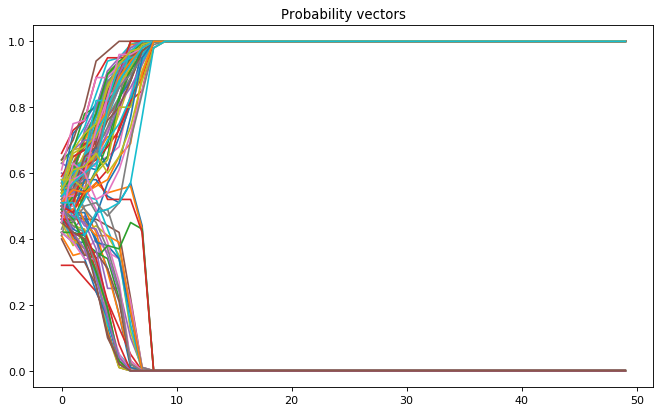

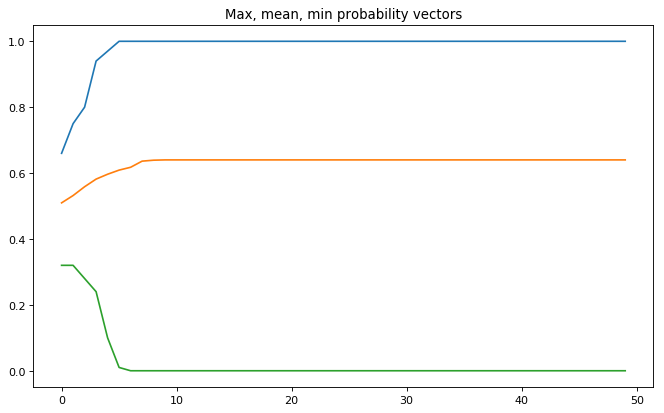

In [158]:
params = {
    'T': 50,
    'F': partial(k_deceptive_one_max, 25),
    'N': 50000,
    'M': 100,
    'd': 100,
}
run_umda(**params)

  0     0.36969113 min:  38.00000000 mean:  58.63446000 max:  85.00000000 std:   5.38138277
  5     2.25493789 min:  67.00000000 mean:  83.23646000 max:  97.00000000 std:   3.67663796
 10     3.93124294 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 15     5.68644977 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 20     7.47380900 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 25     9.37432647 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 30    11.28368640 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 35    13.19683361 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 40    14.97603464 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 45    16.82053590 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:   0.00000000
 49    18.25242114 min: 100.00000000 mean: 100.00000000 max: 100.00000000 std:  

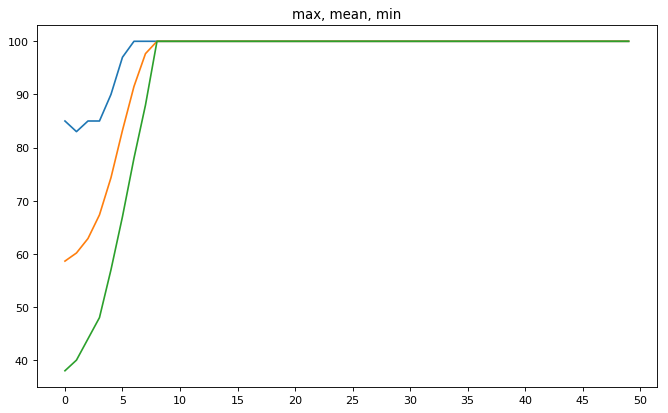

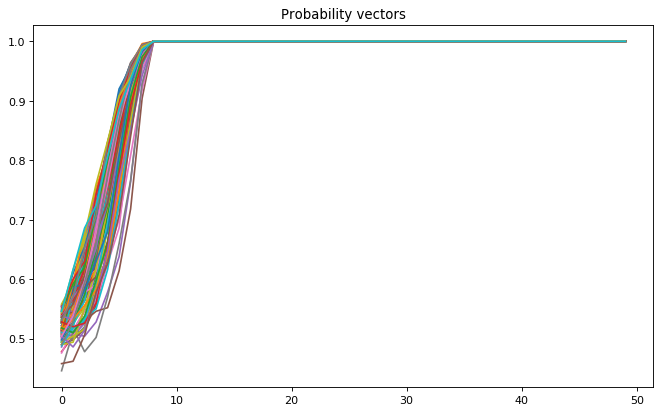

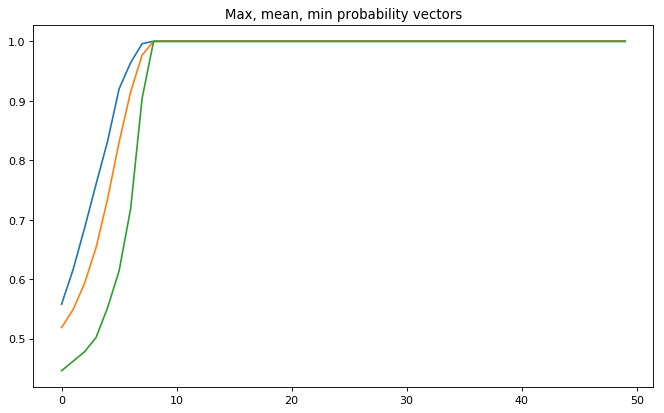

In [159]:
params = {
    'T': 50,
    'F': partial(k_deceptive_one_max, 25),
    'N': 50000,
    'M': 500,
    'd': 100,
}
run_umda(**params)

  0     0.42947316 min:  39.00000000 mean:  59.28800000 max:  82.00000000 std:   5.41344031
  5     2.54823351 min:  77.00000000 mean:  97.10496000 max: 111.00000000 std:   4.55419624
 10     4.99571586 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:   0.00000000
 15     7.43485403 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:   0.00000000
 20     9.66627073 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:   0.00000000
 25    12.06145430 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:   0.00000000
 30    14.46005130 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:   0.00000000
 35    16.98544049 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:   0.00000000
 40    19.32356477 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:   0.00000000
 45    21.63078260 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:   0.00000000
 49    23.46434045 min: 112.00000000 mean: 112.00000000 max: 112.00000000 std:  

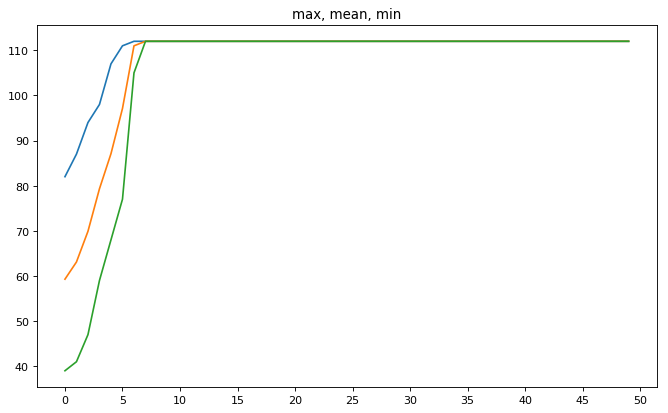

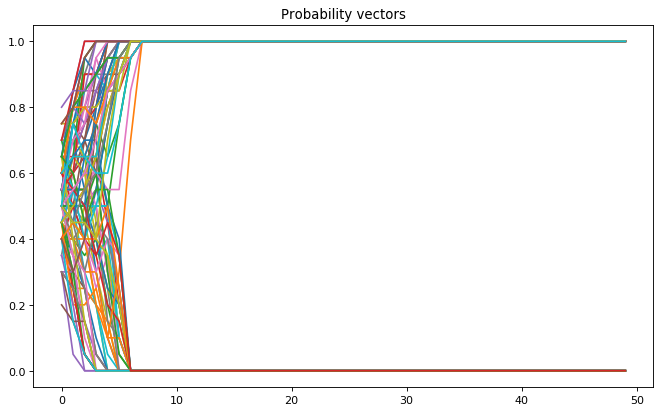

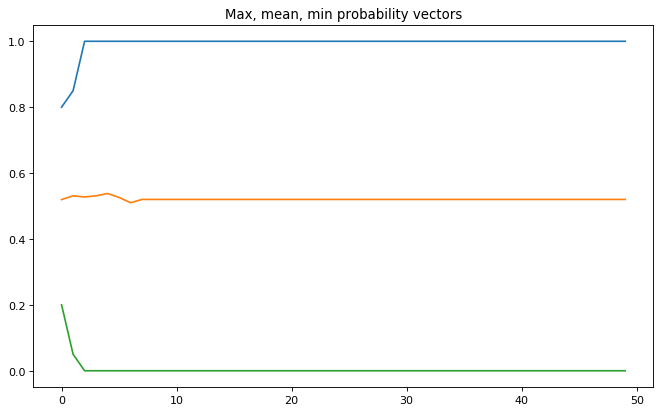

In [160]:
params = {
    'T': 50,
    'F': partial(k_deceptive_one_max, 25),
    'N': 50000,
    'M': 20,
    'd': 100,
}
run_umda(**params)

  0     0.79586005 min:  38.00000000 mean:  58.03821000 max:  85.00000000 std:   5.58057793
  5     4.95983338 min:  72.00000000 mean:  91.79782000 max: 108.00000000 std:   4.31175640
 10     9.93719196 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:   0.00000000
 15    14.42716098 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:   0.00000000
 20    18.89522934 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:   0.00000000
 25    23.56357789 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:   0.00000000
 30    28.16556311 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:   0.00000000
 35    33.78611493 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:   0.00000000
 40    40.33583927 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:   0.00000000
 45    46.51258755 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:   0.00000000
 49    50.27284217 min: 111.00000000 mean: 111.00000000 max: 111.00000000 std:  

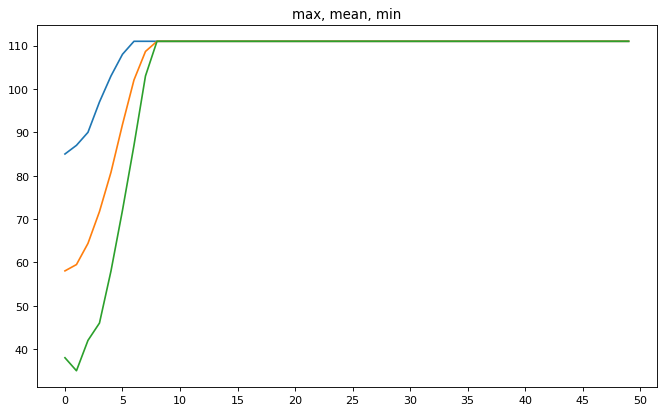

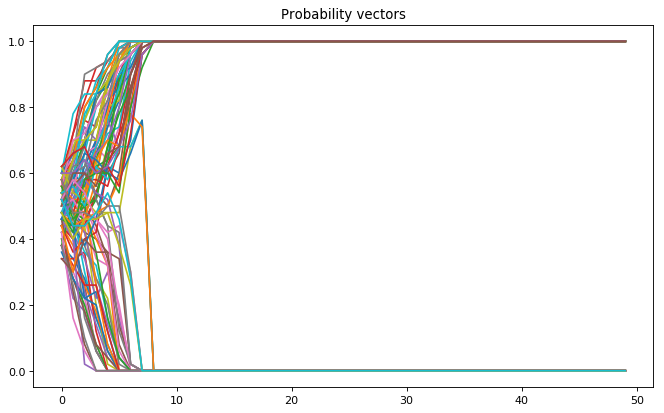

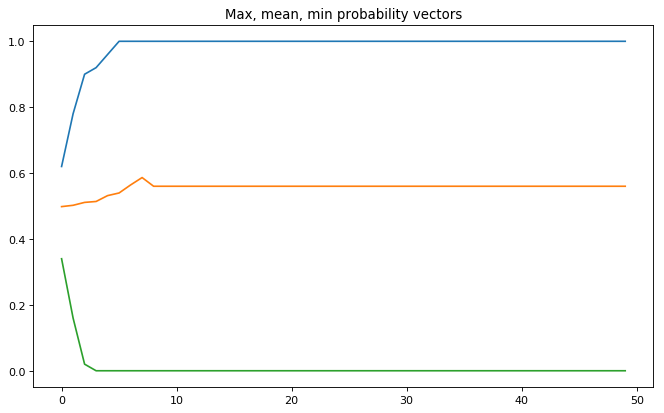

In [162]:
params = {
    'T': 50,
    'F': partial(k_deceptive_one_max, 25),
    'N': 100000,
    'M': 50,
    'd': 100,
}
run_umda(**params)